# TABLE OF CONTENTS
### [OVERVIEW OF OSEMiNl](#OVERVIEW-OF-OSEMiN)
- [OBTAIN](#OBTAIN) 
- [SCRUB](#SCRUB) 
- [EXPLORE](#EXPLORE) 
- [MODEL](#MODEL) 
- [iNTERPRET](#iNTERPRET) 

### [CONCLUSIONS & RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)
___

## Mod One Project Submission

Please fill out:
* Student name: John Lemaster
* Student pace: Online full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco & James Irving
* Blog post URL:

# OBTAIN

## Business Requirements
Lemaster Consulting has been engaged by Flips Inc. to research King County housing market to help them make better investment decisions on which properties to buy, rehab and resell for a profit.  Lemaster Consulting will do data research to recommend what which types of properties and more importantly which features have the most potential to increase profit margins.

In [1]:
%ls

CONTRIBUTING.md             output_61_0.png
LICENSE.md                  output_63_0.png
OSEMIN_scaffolding.ipynb    output_65_0.png
README.md                   output_67_0.png
awesome.gif                 output_69_0.png
column_names.md             output_71_0.png
kc_house_data.csv           output_73_0.png
module1_project_rubric.pdf  output_75_0.png
output_40_0.png             output_99_0.png
output_44_0.png             readme old.md
output_48_0.png             student.ipynb
output_55_0.png             student_lemaster/
output_57_0.png             student_lemaster.ipynb
output_59_0.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline
inline_rc = dict(mpl.rcParams)

plt.style.use('seaborn')

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest as normtest # D'Agostino and Pearson's omnibus test

from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

In [4]:
# Ignore pink warnings 
import warnings
warnings.filterwarnings('ignore')

# Allow for a large # of columns
pd.set_option('display.max_columns',0)
# pd.set_option('display.max_rows','')

## Review column labels and make sure understand them.  Saved label names & descriptions below.

Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Inspect Data

### Removed view and yr_renovated columns because of insufficient data and those features/columns don't affect desired technical & business outcomes.

In [6]:
df.drop(['view', 'yr_renovated'], axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [7]:
print(len(df))

21597


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleansing

### Start already by looking for numbers "stored" as Objects (see above). There are two: date and sqft_basement. I am highly considering removing date column because I don’t think it will be important for any of my data models for this project. Let's explore sqft_basement to decide to keep this feature or to convert from object and to clean the data/obsevations of placeholders and null values.

In [9]:
df['sqft_basement']

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6             ?
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18            ?
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581         ?
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

### There's a lot of useless data in the sqft_basement column and poor correlations for project outcomes; therefore, removing this column.

In [10]:
df.drop(['sqft_basement'], axis=1, inplace=True)

### Removing columns based upon domain knowledge (see below for the columns).  These will not be features to help with model predictions

In [11]:
df.drop(['id', 'date', 'lat', 'long'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,98074,1800,7503


### Next, I will "look for" null values & decide how to manage them.

In [12]:
nulls = df.isna().sum()
print(nulls[nulls > 0])  # viewing just the null columns so not viewing a long list like above

waterfront    2376
dtype: int64


In [13]:
(nulls[nulls > 0])/len(df.index)  #What percentage of the data in null columns

waterfront    0.110015
dtype: float64

### Since it is just shy of 10% of null data, then removing the null rows.

In [14]:
df.dropna(subset= ['waterfront'], inplace=True)
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Great! All null values have been removed (see above).

### More data cleaning:  bedrooms has an observation that is 33.  Will remove that outlier.

In [15]:
idx_bedrooms = df.loc[df['bedrooms']>10].index
idx_bedrooms
df.drop(idx_bedrooms,axis=0,inplace=True)
df.loc[df['bedrooms']>10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15


In [16]:
df.isna().sum() #One last search for NaN values.

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df.waterfront.unique()

array([0., 1.])

# EXPLORE

## Overview Visulizations for Distribution of Data

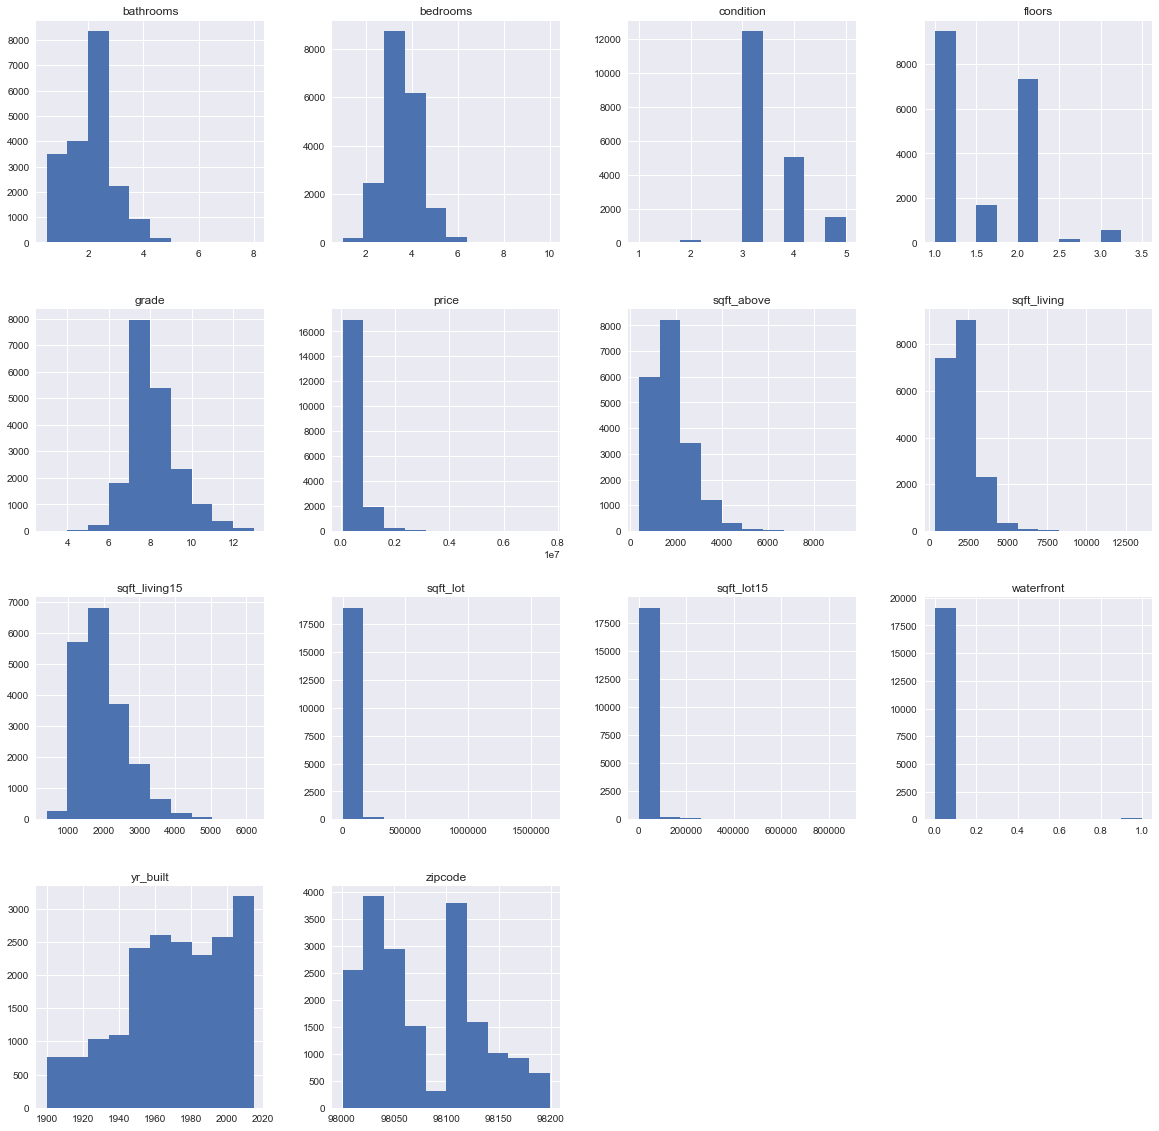

In [18]:
df.hist(figsize=(20,20)); 

### A quick observation of the distribution of data:  grade, bedrooms & sqft_living15 columns/features could be good areas to focus where to invest to find the best homes to "flip."

## Multicollinearity

### Starting thinking/pondering which features could have multicollinearity with a heat-map.

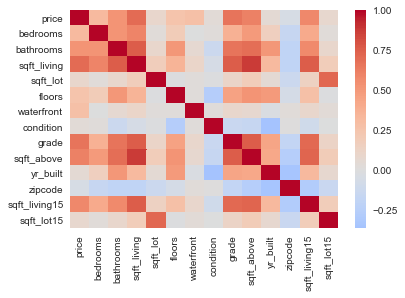

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm', center=0,);

In [20]:
df.corr().round(2)  # A multicollinearity quickview

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.00,0.32,0.53,0.70,0.09,0.26,0.28,0.04,0.67,0.61,0.05,-0.05,0.58,0.08
bedrooms,0.32,1.00,0.53,0.60,0.03,0.19,-0.00,0.02,0.37,0.50,0.16,-0.16,0.41,0.03
bathrooms,0.53,0.53,1.00,0.76,0.09,0.51,0.07,-0.13,0.67,0.69,0.51,-0.20,0.57,0.09
sqft_living,0.70,0.60,0.76,1.00,0.17,0.36,0.11,-0.06,0.76,0.88,0.32,-0.20,0.76,0.18
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,-0.01,0.11,0.18,0.06,-0.13,0.15,0.72
floors,0.26,0.19,0.51,0.36,-0.01,1.00,0.02,-0.26,0.46,0.53,0.49,-0.06,0.28,-0.01
waterfront,0.28,-0.00,0.07,0.11,0.02,0.02,1.00,0.02,0.09,0.08,-0.03,0.03,0.09,0.03
condition,0.04,0.02,-0.13,-0.06,-0.01,-0.26,0.02,1.00,-0.14,-0.16,-0.36,0.00,-0.09,-0.01
grade,0.67,0.37,0.67,0.76,0.11,0.46,0.09,-0.14,1.00,0.76,0.45,-0.18,0.71,0.12
sqft_above,0.61,0.50,0.69,0.88,0.18,0.53,0.08,-0.16,0.76,1.00,0.42,-0.26,0.73,0.19


### Find where multicollinearity is to high (greater than 75%) to remove redundant features.

In [21]:
#function for visualization of multicollinearity with detials both nemerical and as a heatmap.

def multiplot(df,annot=True,fig_size=None):
    """EDA: Plots results from df.corr() in a correlation heat map for multicollinearity.
    Returns fig, ax objects"""
    import seaborn as sns
    sns.set(style="white")
    from string import ascii_letters
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    # Set up the matplotlib figure
    if fig_size==None:
        figsize=(16,16)
    else:
        figsize = fig_size

    f, ax = plt.subplots(figsize=(figsize))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=annot, cmap=cmap, center=0,

    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return f, ax


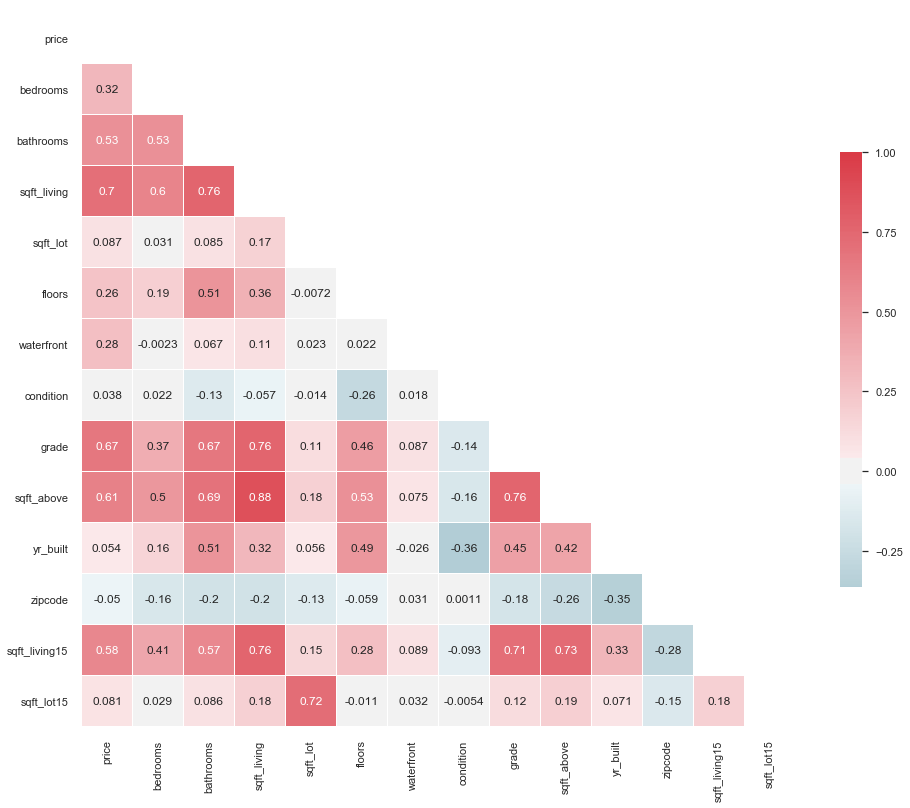

In [22]:
multiplot(df,annot=True,fig_size=None);

### Next, remove columns that have too high of multicollinearity (greater than .75).  See above chart for reference of those columns.

In [23]:
df.drop(['sqft_above', 'grade'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,zipcode,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,1987,98074,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,2001,98053,4760,101930


In [24]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'yr_built', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

#### Scatterplots of price versus some of the data features

In [25]:
sns.set_context('poster')
sns.set_style('ticks')


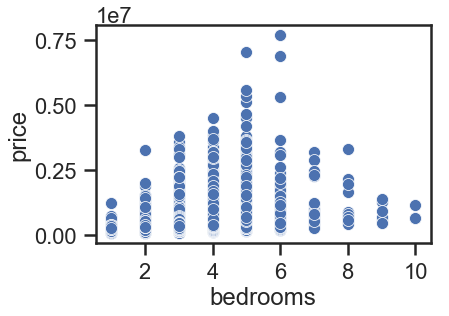

In [26]:
sns.scatterplot(x= 'bedrooms', y= 'price', data= df)

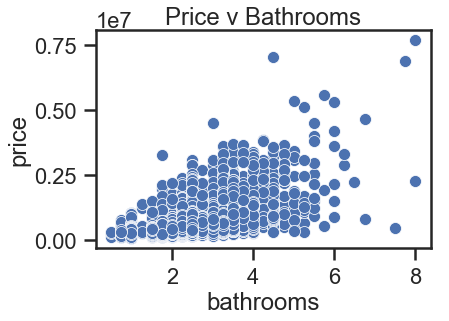

In [27]:
sns.scatterplot(x= 'bathrooms', y= 'price', data= df).set(title= 'Price v Bathrooms');

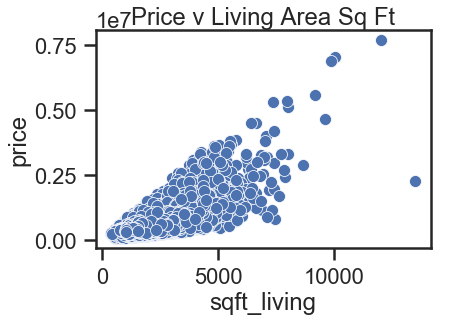

In [28]:
sns.scatterplot(x= 'sqft_living', y= 'price', data= df).set(title= 'Price v Living Area Sq Ft');

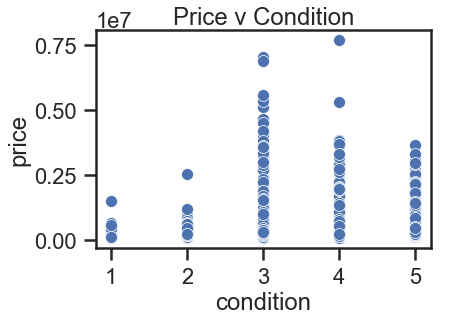

In [29]:
sns.scatterplot(x= 'condition', y= 'price', data= df).set(title= 'Price v Condition');

In [30]:
print(len(df))

19219


## Linear Regression Graphical Analysis (by each Feature)

In [31]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

In [32]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [33]:
def dist_reg_plot(df,feature_col,target_col='price',style_name='dark_background',figsize=(10,4)):
    """Plots a seaborn distplot for the feature_col column in df,
    and a seaborn regplot of feature_col vs target_col."""
    import matplotlib.pyplot as plt
    with plt.style.context(style_name):
        ## Create fig and ax as side by side subplots (ncols=2)
        import matplotlib.pyplot as plt 
        import seaborn as sns
        fig, ax = plt.subplots(ncols=2,figsize=figsize)


        # SUBPLOT 1: histogram+kde
        sns.distplot(df[feature_col], label=feature_col, ax=ax[0])
        ax[0].set_title(f'Column: {feature_col}',fontdict={'weight':'bold','size':14})
        ax[0].set_xlabel('Price')
        ax[0].set_ylabel(f"Column: {feature_col}")


        # SUBPLOT 2: scatter+line plot
        sns.regplot(data=df,x=feature_col,y=target_col,ax=ax[1])

        plt.tight_layout()
        plt.suptitle(f"Column: {feature_col}")

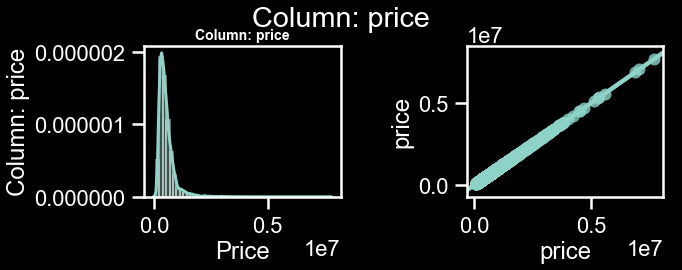

In [34]:
dist_reg_plot(df,'price')

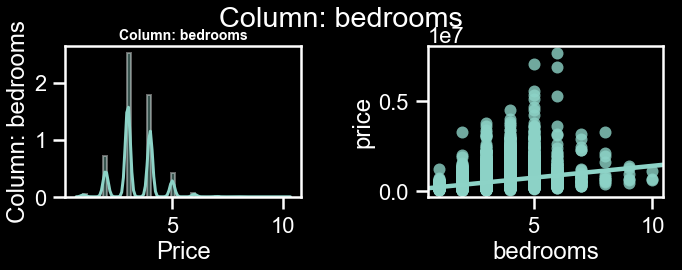

In [35]:
dist_reg_plot(df, 'bedrooms')

### Observations:  bedrooms
### More bedrooms more price.

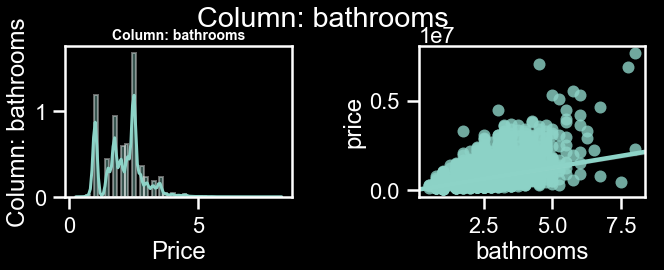

In [36]:
dist_reg_plot(df, 'bathrooms')

### Observations: bathrooms
### More bathrooms more price but after 3 doesn't matter as much. 

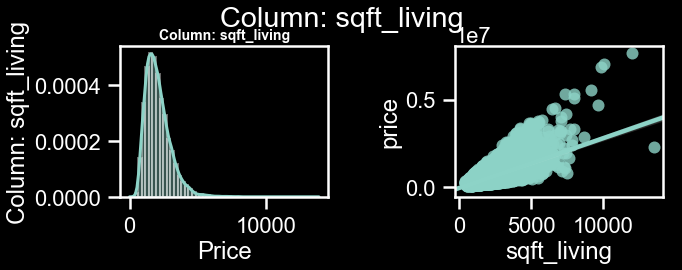

In [37]:
dist_reg_plot(df, 'sqft_living')

### Observations: sqft_living        
### Overall really like this feature.  The first skew is not perfect but does show square feet correlates to price and the second graph has a blob at the regression line.  

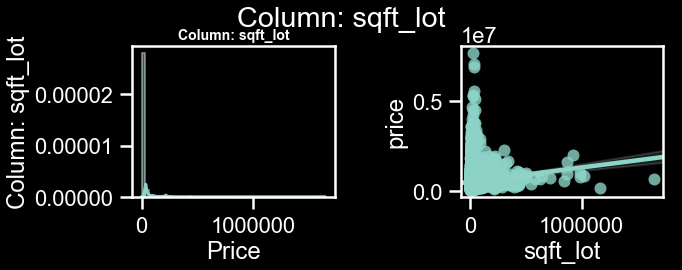

In [38]:
dist_reg_plot(df, 'sqft_lot')

### Observations: sqft_lot       
### Remove this feature.

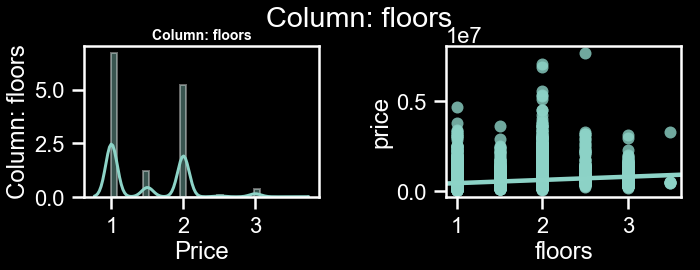

In [39]:
dist_reg_plot(df, 'floors')

### Observations:  floors
### Overall interpretation is that floors don't matter enough to "drive the price up."  Remove this feature.

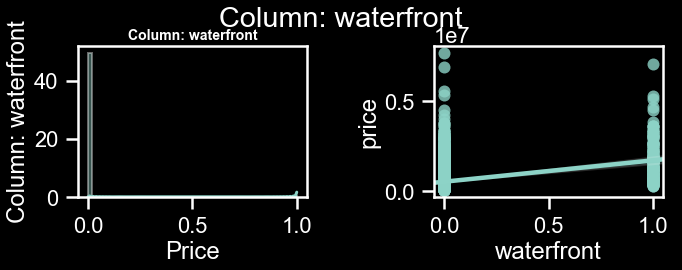

In [40]:
dist_reg_plot(df, 'waterfront')

### Observations:  waterfront
### Cannot interrupt any meaningful knowledge from these graphs.  

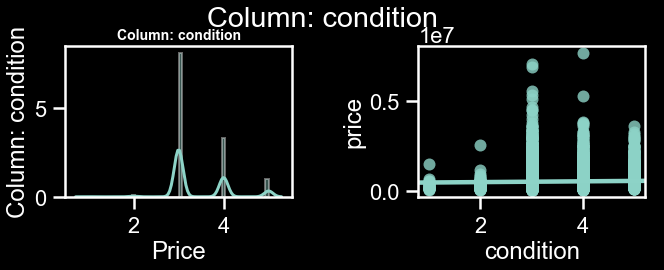

In [41]:
dist_reg_plot(df, 'condition')

### Observations:  condition
### Care most about condition of 3 & 4.  

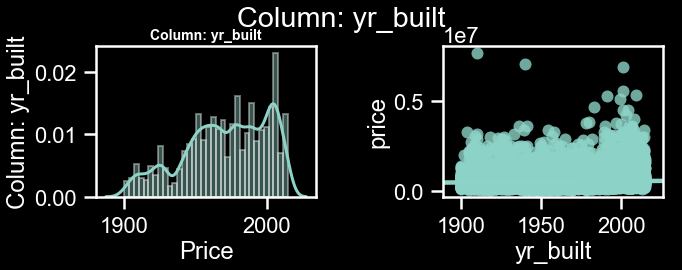

In [42]:
dist_reg_plot(df, 'yr_built')

### Observations:  yr_built
### It seems like homes built after 1950 is a "good start" but there are considerable volatility in price after that timeframe.  Perhaps also could focus on homes built in the last 20 years.  

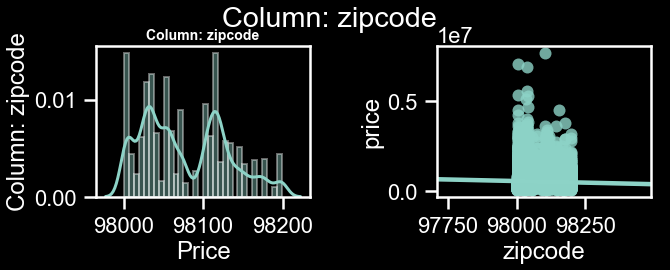

In [43]:
dist_reg_plot(df, 'zipcode')

### Observations:  zipcode
### It's clear there are zip codes that have a much higher price than others.

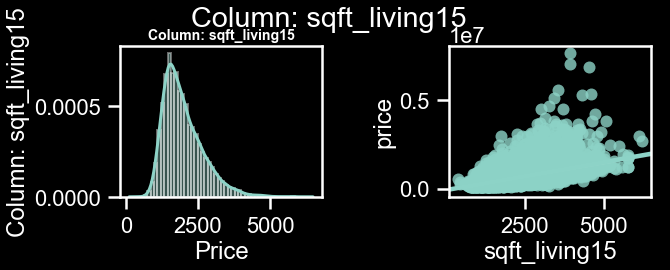

In [44]:
dist_reg_plot(df, 'sqft_living15')

### Observations:  sqft_living15
### There are some definitely some outliers but both graphs drive price.  A great feature. 

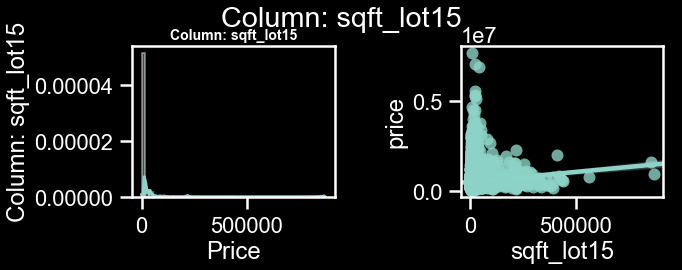

In [45]:
dist_reg_plot(df, 'sqft_lot15')

### Observations:  sqft_lot15
### Remove this feature.

### Based on observations remove the follwing features/columns: sqft_living, floors & sqft_lot15

In [46]:
df.drop(['sqft_living', 'floors', 'sqft_lot15', 'yr_built'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_lot,waterfront,condition,zipcode,sqft_living15
1,538000.0,3,2.25,7242,0.0,3,98125,1690
2,180000.0,2,1.00,10000,0.0,3,98028,2720
3,604000.0,4,3.00,5000,0.0,5,98136,1360
4,510000.0,3,2.00,8080,0.0,3,98074,1800
5,1230000.0,4,4.50,101930,0.0,3,98053,4760


## OLS Model

### A quick view of the OLS model to look at some of the results of the EDA (Exploratory Data Analysis) 

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
f = 'price~C(bedrooms)+C(bathrooms)+C(zipcode)'
model = ols(formula=f, data=df).fit()

In [49]:
model.summary()  #Model with categorical data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 01 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:30:20   Log-Likelihood:            -2.6414e+05
No. Observations:               19219   AIC:                         5.285e+05
Df Residuals:                   19112   BIC:                         5.293e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.456e+04   1.15e+05      0.563      0.573    -1.6e+05    2.89e+05
C(bedrooms)[T.2]      2.156e+04   1.82e+04      1.186      0.236   -1.41e+04    5.72e+04
C(bedrooms)[T.3]      5.205e+04   1.81e+04      2.879      0.004    1.66e+04    8.75e+04
C(bedrooms)[T.4]      1.126e+05   1.83e+04      6.141      0.000    7.67e+04    1.49e+05
C(bedrooms)[T.5]      1.112e+05   1.92e+04      5.785      0.000    7.35e+04    1.49e+05
C(bedrooms)[T.6]      5.538e+04   2.39e+04      2.320      0.020    8592.128    1.02e+05
C(bedrooms)[T.7]     -2.569e+05   4.34e+04     -5.917      0.000   -3.42e+05   -1.72e+05
C(bedrooms)[T.8]     -6.477e+04   7.16e+04     -0.905      0.366   -2.05e+05    7.55e+04
C(bedrooms)[T.9]     -1.909e+05   1.04e+05     -1.839      0.066   -3.94e+05    1.26e+04
C(bedrooms)[T.10]    -3.907e+05   1.34e+05     -2.916      0.004   -6.53e+05   -1.28e+05
C(bathrooms)[T.0.75]  3.167e+04   1.17e+05      0.272      0.786   -1.97e+05     2.6e+05
C(bathrooms)[T.1.0]   3.948e+04   1.13e+05      0.349      0.727   -1.82e+05    2.61e+05
C(bathrooms)[T.1.25]  1.904e+05   1.39e+05      1.375      0.169   -8.11e+04    4.62e+05
C(bathrooms)[T.1.5]   6.721e+04   1.13e+05      0.593      0.553   -1.55e+05    2.89e+05
C(bathrooms)[T.1.75]  9.874e+04   1.13e+05      0.872      0.383   -1.23e+05    3.21e+05
C(bathrooms)[T.2.0]   1.017e+05   1.13e+05      0.897      0.370    -1.2e+05    3.24e+05
C(bathrooms)[T.2.25]  1.495e+05   1.13e+05      1.319      0.187   -7.27e+04    3.72e+05
C(bathrooms)[T.2.5]   2.031e+05   1.13e+05      1.793      0.073   -1.89e+04    4.25e+05
C(bathrooms)[T.2.75]  2.417e+05   1.13e+05      2.130      0.033    1.93e+04    4.64e+05
C(bathrooms)[T.3.0]   2.869e+05   1.14e+05      2.526      0.012    6.43e+04     5.1e+05
C(bathrooms)[T.3.25]  4.876e+05   1.14e+05      4.289      0.000    2.65e+05     7.1e+05
C(bathrooms)[T.3.5]    4.51e+05   1.14e+05      3.970      0.000    2.28e+05    6.74e+05
C(bathrooms)[T.3.75]  6.384e+05   1.15e+05      5.555      0.000    4.13e+05    8.64e+05
C(bathrooms)[T.4.0]   7.767e+05   1.15e+05      6.744      0.000    5.51e+05       1e+06
C(bathrooms)[T.4.25]  9.338e+05   1.16e+05      8.026      0.000    7.06e+05    1.16e+06
C(bathrooms)[T.4.5]   8.447e+05   1.16e+05      7.293      0.000    6.18e+05    1.07e+06
C(bathrooms)[T.4.75]   1.41e+06   1.23e+05     11.438      0.000    1.17e+06    1.65e+06
C(bathrooms)[T.5.0]   1.246e+06   1.26e+05      9.889      0.000    9.99e+05    1.49e+06
C(bathrooms)[T.5.25]  1.125e+06   1.33e+05      8.472      0.000    8.65e+05    1.39e+06
C(bathrooms)[T.5.5]   1.867e+06   1.34e+05     13.923      0.000     1.6e+06    2.13e+06
C(bathrooms)[T.5.75]  1.995e+06   1.74e+05     11.487      0.000    1.65e+06    2.33e+06
C(bathrooms)[T.6.0]   2.123e+06   1.47e+05     14.462    

### Have made very good progress.  R Squared is above .75 for the features that will affect the prices of homes to invest.  

# MODEL

In [50]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,waterfront,condition,zipcode,sqft_living15
1,538000.0,3,2.25,7242,0.0,3,98125,1690
2,180000.0,2,1.00,10000,0.0,3,98028,2720
3,604000.0,4,3.00,5000,0.0,5,98136,1360
4,510000.0,3,2.00,8080,0.0,3,98074,1800
5,1230000.0,4,4.50,101930,0.0,3,98053,4760


## Model: Recursive Feature Elimination (RFE) 

In [51]:
df_old = df.copy() 

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=1)

Y = df['price']  # Dependant variable
X = df.drop('price', axis=1)  #features to compare (and independant variable)

#Scaling the data...making sure that the data is on the same scale
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

linreg.fit(scaled_data, Y)  # "run" the model to scale the data

selector = selector.fit(X,Y)

df  = pd.DataFrame(scaled_data, columns=df.drop('price', axis=1).columns)#.drop('price',axis=1).columns)
df['price'] = Y

In [53]:
selector.ranking_

array([4, 2, 7, 1, 3, 5, 6])

In [54]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'condition',
       'zipcode', 'sqft_living15'],
      dtype='object')

In [55]:
ranking = dict(zip(X.columns, selector.ranking_))  # creating view of features rank
ranking

{'bedrooms': 4,
 'bathrooms': 2,
 'sqft_lot': 7,
 'waterfront': 1,
 'condition': 3,
 'zipcode': 5,
 'sqft_living15': 6}

In [56]:
df_rank = pd.DataFrame({'features' : X.columns, 'rank' : selector.ranking_})
df_rank.sort_values('rank')

,features,rank
3,waterfront,1
1,bathrooms,2
4,condition,3
0,bedrooms,4
5,zipcode,5
6,sqft_living15,6
2,sqft_lot,7


## Top 5 features:
1. waterfront
2. bathrooms
3. condition
4. bedrooms
5. zipcode

In [57]:
f2 = 'price~waterfront'
model_2 = ols(formula=f2, data=df).fit()

## Let's "look at" p-value of price ~ waterfront feature.

In [58]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05539
Date:                Fri, 01 Nov 2019   Prob (F-statistic):              0.814
Time:                        14:30:21   Log-Likelihood:            -2.4367e+05
No. Observations:               17109   AIC:                         4.874e+05
Df Residuals:                   17107   BIC:                         4.874e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.355e+05   2846.521    188.130      0.000     5.3e+05    5.41e+05
waterfront -7541.6642    3.2e+04     -0.235      0.814   -7.04e+04    5.53e+04
==============================================================================
Omnibus:                    15958.401   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1164990.647
Skew:                           4.309   Prob(JB):                         0.00
Kurtosis:                      42.496   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Great!  Met threshold.  

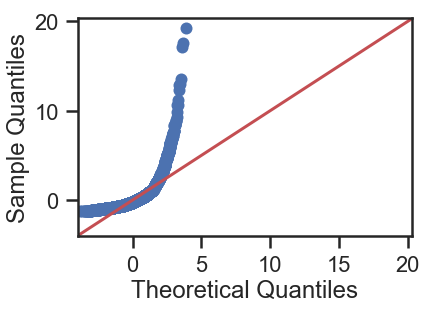

In [59]:
import statsmodels.api as sma
import scipy.stats as stats
residuals = model_2.resid
fig = sma.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

The QQ Plot shows its a normal distribution ("kind-of") with a positive skew

In [60]:
f3 = 'price~bathrooms'
model_3 = ols(formula=f3, data=df).fit()  #Model for price to bathrooms

## Let's "look at" p-value of price ~ bathrooms feature.

In [61]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6794
Date:                Fri, 01 Nov 2019   Prob (F-statistic):              0.410
Time:                        14:30:22   Log-Likelihood:            -2.4367e+05
No. Observations:               17109   AIC:                         4.874e+05
Df Residuals:                   17107   BIC:                         4.874e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.305e+05   6602.405     80.356      0.000    5.18e+05    5.43e+05
bathrooms   2.275e+04   2.76e+04      0.824      0.410   -3.13e+04    7.68e+04
==============================================================================
Omnibus:                    15957.653   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1164672.163
Skew:                           4.309   Prob(JB):                         0.00
Kurtosis:                      42.490   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Great!  Met threshold

## Let's "look at" p-value of price ~ condition feature.

In [62]:
f4 = 'price~condition'
model_4 = ols(formula=f4, data=df).fit() #for condition feature

In [63]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8867
Date:                Fri, 01 Nov 2019   Prob (F-statistic):              0.346
Time:                        14:30:22   Log-Likelihood:            -2.4367e+05
No. Observations:               17109   AIC:                         4.874e+05
Df Residuals:                   17107   BIC:                         4.874e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.453e+05   1.09e+04     50.190      0.000    5.24e+05    5.67e+05
condition  -1.638e+04   1.74e+04     -0.942      0.346   -5.05e+04    1.77e+04
==============================================================================
Omnibus:                    15956.468   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1163914.423
Skew:                           4.309   Prob(JB):                         0.00
Kurtosis:                      42.477   Cond. No.                         8.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Great! Met threshold.   

## Let's "look at" p-value of bedrooms ~ condition feature.

In [64]:
f5 = 'price~bedrooms'
model_5 = ols(formula=f5, data=df).fit() #for bedrooms feature

In [65]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2355
Date:                Fri, 01 Nov 2019   Prob (F-statistic):              0.627
Time:                        14:30:22   Log-Likelihood:            -2.4367e+05
No. Observations:               17109   AIC:                         4.874e+05
Df Residuals:                   17107   BIC:                         4.874e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.391e+05   7976.895     67.580      0.000    5.23e+05    5.55e+05
bedrooms   -1.371e+04   2.83e+04     -0.485      0.627   -6.91e+04    4.17e+04
==============================================================================
Omnibus:                    15959.123   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1165339.291
Skew:                           4.310   Prob(JB):                         0.00
Kurtosis:                      42.502   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Great! Met threshold.   

In [66]:
df.describe().round(2)

,bedrooms,bathrooms,sqft_lot,waterfront,condition,zipcode,sqft_living15,price
count,19219.00,19219.00,19219.00,19219.00,19219.00,19219.00,19219.00,17109.00
mean,0.26,0.22,0.01,0.01,0.60,0.39,0.27,535456.45
std,0.10,0.10,0.02,0.09,0.16,0.27,0.12,370846.72
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78000.00
25%,0.22,0.17,0.00,0.00,0.50,0.16,0.19,315275.00
50%,0.22,0.23,0.00,0.00,0.50,0.32,0.25,449950.00
75%,0.33,0.27,0.01,0.00,0.75,0.59,0.34,637800.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7700000.00


## Final Model:  price ~ waterfront, bathrooms, condition, bedrooms and zipcode

In [67]:
f_final = 'price~C(waterfront)+bathrooms+condition+bedrooms+C(zipcode)'
model_final = ols(formula=f_final, data=df).fit() 

In [68]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.036
Date:                Fri, 01 Nov 2019   Prob (F-statistic):              0.394
Time:                        14:30:23   Log-Likelihood:            -2.4364e+05
No. Observations:               17109   AIC:                         4.874e+05
Df Residuals:                   17035   BIC:                         4.880e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           5.728e+05   2.56e+04     22.355      0.000    5.23e+05    6.23e+05
C(waterfront)[T.1.0]               -3910.7684   3.29e+04     -0.119      0.905   -6.85e+04    6.06e+04
C(zipcode)[T.0.005050505050519405] -3.566e+04   3.67e+04     -0.973      0.331   -1.07e+05    3.62e+04
C(zipcode)[T.0.01010101010103881]  -2.719e+04   3.26e+04     -0.834      0.404   -9.11e+04    3.67e+04
C(zipcode)[T.0.015151515151501371] -6.185e+04    3.2e+04     -1.936      0.053   -1.24e+05     781.158
C(zipcode)[T.0.020202020202020776] -6.981e+04   3.84e+04     -1.816      0.069   -1.45e+05    5549.826
C(zipcode)[T.0.02525252525254018]  -3.065e+04   2.87e+04     -1.069      0.285   -8.68e+04    2.55e+04
C(zipcode)[T.0.030303030303002743] -6.784e+04   4.21e+04     -1.612      0.107    -1.5e+05    1.46e+04
C(zipcode)[T.0.03535353535352215]  -4.217e+04   3.28e+04     -1.285      0.199   -1.07e+05    2.22e+04
C(zipcode)[T.0.04545454545456096]   1.226e+05    4.8e+04      2.555      0.011    2.85e+04    2.17e+05
C(zipcode)[T.0.05050505050502352]   4038.4960   3.64e+04      0.111      0.912   -6.73e+04    7.54e+04
C(zipcode)[T.0.06565656565658173]  -3.521e+04    4.4e+04     -0.800      0.424   -1.21e+05     5.1e+04
C(zipcode)[T.0.09090909090906507]   -4.73e+04   3.77e+04     -1.255      0.210   -1.21e+05    2.66e+04
C(zipcode)[T.0.10606060606062329]  -5.571e+04   3.52e+04     -1.584      0.113   -1.25e+05    1.32e+04
C(zipcode)[T.0.11111111111108585]   -1.64e+04   2.87e+04     -0.572      0.567   -7.26e+04    3.98e+04
C(zipcode)[T.0.11616161616160525]    877.2686   4.99e+04      0.018      0.986    -9.7e+04    9.87e+04
C(zipcode)[T.0.13131313131310662]  -2.269e+04   2.96e+04     -0.767      0.443   -8.07e+04    3.53e+04
C(zipcode)[T.0.13636363636362603]   2.094e+04    3.3e+04      0.635      0.526   -4.37e+04    8.56e+04
C(zipcode)[T.0.14141414141414543]  -3.283e+04   3.16e+04     -1.038      0.300   -9.49e+04    2.92e+04
C(zipcode)[T.0.14646464646466484]  -3.945e+04   3.37e+04     -1.170      0.242   -1.06e+05    2.67e+04
C(zipcode)[T.0.1515151515151274]   -7.255e+04   3.31e+04     -2.195      0.028   -1.37e+05   -7767.177
C(zipcode)[T.0.1565656565656468]   -5.107e+04   4.25e+04     -1.201      0.230   -1.34e+05    3.23e+04
C(zipcode)[T.0.1616161616161662]   -4.679e+04   2.97e+04     -1.577      0.115   -1.05e+05    1.14e+04
C(zipcode)[T.0.16666666666668561]  -2.812e+04   2.82e+04     -0.996      0.319   -8.35e+04    2.72e+04
C(zipcode)[T.0.1868686868687064]   -3.967e+04   2.76e+04     -1.439      0.150   -9.37e+04    1.44e+04
C(zipcode)[T.0.19191919191916895]   6.622e+04    6.2e+04      1.068      0.286   -5.53e+04    1.88e+05
C(zipcode)[T.0.19696969696968836]  -9639.6048   3.35e+04     -0.288      0.773   -7.52e+04     5

# iNTERPRET

#### We started our data management process by reviewing 18 features that could possibly affect the value of homes.  After deploying a rigorous approach of researching these data types, we found that only 6 produce your desired outcomes.  Our interpretations have found that many of these features produce the same result sets. In addition, some of the features have very little to no affect on housing prices. 



# CONCLUSIONS & RECOMMENDATIONS

## Recommendation 1

### We recommend that you focus your staff ’s valuable time and efforts as well as your investments dollars on the following features for the homes you purchase:

#### Waterfront views
#### Number of bathrooms
#### The condition of the homes
#### Number of bedrooms
#### Where the homes are located by top zip codes
#### The living area square footage

### These above features will maximize your profits.

## Recommendation 2

### We also recommend that your staff not search other features in this database because, if they do, then they will continue to waste not just their valuable time/efforts but a lot of your investment portfolio dollars.  You'll reduce your teams’ data research efforts by at least 50% and invest into more profitable properties.
.
## Recommendation 3

### Strategies for buy low, rehab, and sell high business model:

#### Search for homes with wasted living space with decent square footage to spend rehab dollars on creating more living area square footage, adding bathrooms and bedrooms (if needed).  Ideal ranges for the following features:
##### 1) Approximate square footage of 2000.  Note that more is not also better because the price starts to go down at a fairly decent slope after 2000 square feet.
##### 2) The highest value for bedrooms is at 3.  The second highest is at 4.  Definitely stop adding bedrooms at 5.  In fact, should only have that many bedrooms as an exception...not as as a rule.
##### 3) The highest value for number of bathrooms is 2 to 2.5.  Definitely stop at 3 because there is little to know value after 2.5 bathrooms.
  

 


